In [1]:
import pandas as pd #type:ignore
import numpy as np
import matplotlib.pyplot as plt #type:ignore
import seaborn as sns#type:ignore

In [2]:
df = pd.read_csv('updated_stime.csv')
df.head()

,Date,Times_Unlocked,Time_Spent(minutes)
0,21-04-2024,136,452
1,22-04-2024,140,321
2,23-04-2024,115,197
3,24-04-2024,233,392
4,25-04-2024,178,512


In [3]:
df.describe()

,Times_Unlocked,Time_Spent(minutes)
count,21.000000,21.000000
mean,166.047619,385.333333
std,62.179157,83.841120
min,82.000000,197.000000
25%,115.000000,333.000000
50%,165.000000,376.000000
75%,196.000000,436.000000
max,292.000000,539.000000


In [4]:
df.dtypes

Date                   object
Times_Unlocked          int64
Time_Spent(minutes)     int64
dtype: object

In [5]:
max_time_spent = df['Time_Spent(minutes)'].max()
max_time_unlocks = df['Times_Unlocked'].max()
print(f'MAXIMUM TIME SPENT ON SCREEN: {max_time_spent}')
print(f'MAXIMUM NUMBER OF TIMES DEVICE WAS OPENED: {max_time_unlocks}')


MAXIMUM TIME SPENT ON SCREEN: 539
MAXIMUM NUMBER OF TIMES DEVICE WAS OPENED: 292


In [6]:
df1 = df.where(df['Times_Unlocked']>150)
df1 = df1.dropna()
df1

,Date,Times_Unlocked,Time_Spent(minutes)
3,24-04-2024,233.0,392.0
4,25-04-2024,178.0,512.0
6,27-04-2024,243.0,344.0
7,28-04-2024,165.0,376.0
8,29-04-2024,274.0,503.0
9,30-04-2024,192.0,410.0
10,01-05-2024,224.0,436.0
11,02-05-2024,196.0,328.0
12,03-05-2024,183.0,331.0
14,05-05-2024,292.0,539.0


<Axes: xlabel='Time_Spent(minutes)', ylabel='Times_Unlocked'>

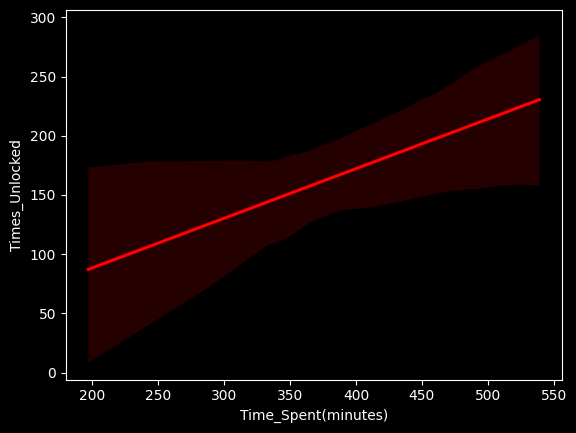

In [7]:
plt.style.use('dark_background')
sns.regplot(data = df,x=df['Time_Spent(minutes)'],y=df['Times_Unlocked'],scatter_kws = {"color": "black", "alpha": 0.5},
            line_kws = {"color": "red"},
            ci = 99)


<Axes: xlabel='Times_Unlocked', ylabel='Count'>

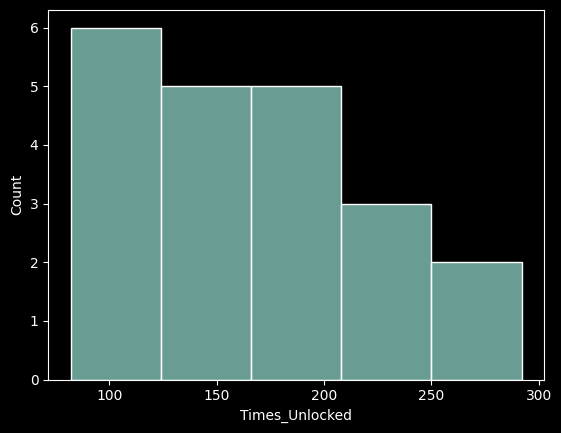

In [16]:
sns.histplot(data=df,x=df['Times_Unlocked'],bins=5)

<Axes: xlabel='Time_Spent(minutes)', ylabel='Count'>

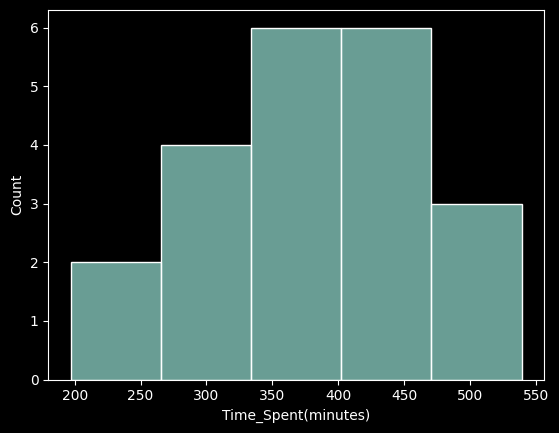

In [9]:
sns.histplot(data=df,x=df['Time_Spent(minutes)'],bins=5)

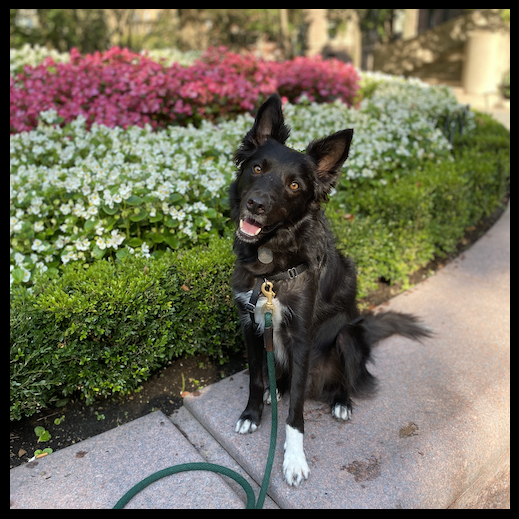

In [10]:
sns.dogplot()
# Who doesn't love a cute doggo

In [11]:
sorted_df = df.sort_values(by='Time_Spent(minutes)',ascending=True)
sorted_df.head()


,Date,Times_Unlocked,Time_Spent(minutes)
2,23-04-2024,115,197
17,08-05-2024,82,261
1,22-04-2024,140,321
11,02-05-2024,196,328
12,03-05-2024,183,331


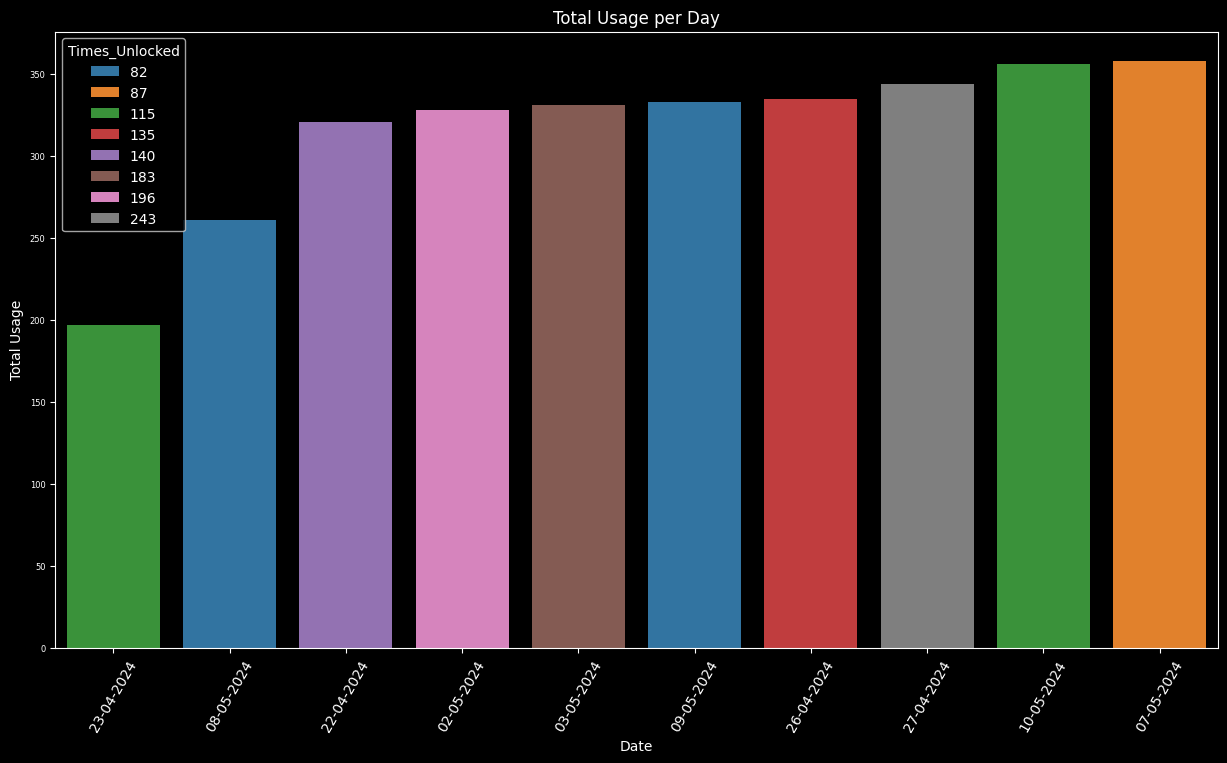

In [12]:

plt.figure(figsize=(15,8))
plt.style.use("dark_background")
sns.barplot(x='Date',y='Time_Spent(minutes)',hue='Times_Unlocked', data = sorted_df.head(10),palette='tab10')
# for iter, row in sorted_df.iterrows():
#     plt.annotate(row['Times_Unlocked'],xy=(row['Times_Unlocked'],iter),color = 'white')
#sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.yticks(fontsize= 6)
plt.ylabel('Total Usage')
plt.xlabel('Date')
plt.xticks(rotation = 60)
plt.title('Total Usage per Day')
plt.show()

In [13]:
df=df.set_index('Date') # Date column now acts as the index for the dataframe

In [14]:
df.corr()

,Times_Unlocked,Time_Spent(minutes)
Times_Unlocked,1.000000,0.564989
Time_Spent(minutes),0.564989,1.000000


#### Training a model for predicting Time Spent based on number of unlocks

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#from sklearn.
from sklearn.metrics import mean_squared_error
from joblib import dump


In [18]:
# Assuming df is your DataFrame
X = df[['Times_Unlocked']]  # Select the feature column(s) for prediction
y = df['Time_Spent(minutes)']  # Select the target column for prediction

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,)


### Taking 3 models and comparing 

In [19]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

best_model = None
best_model_name = ''
best_rmse = float('inf') 

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = mean_squared_error(y_test, y_pred, squared=False)
    print(f'{name} RMSE: {rmse}')

    if rmse < best_rmse:
        best_rmse = rmse
        best_model = model
        best_model_name = name


Linear Regression RMSE: 64.33132922802903
Decision Tree RMSE: 82.18706884732102
Random Forest RMSE: 65.02798138713607


c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [20]:
print(best_model)

LinearRegression()


In [21]:
best_model.predict([[183]])

c:\Users\HP\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([397.49912199])

In [22]:
dump(best_model, 'best_model.joblib')  # Save the best model for future use


['best_model.joblib']